## Population Dynamics:

Models for Population Dynamics:
* Logistic growth model $\dot{x} = bx - dx \to \dot{x} = rx(1-\frac{x}{k})$ (r: growth rate, k: carying capacity)
* Lotka-Volterra nonlinear model for biological environment. (states relation between biological spicious)

both above models are nonlinear some nonlinear method needed to analayze and controll, one way is to use linear approximation around equilibrium points to find out about stibility near them.
Suppose a nominal solutions: $x_n, u_n, y_n$ is known then difference between these and perturbed functions $x(t), u(t), y(t)$
can be defined by:<br>
$\delta x = x - x_n$<br>
$\delta u = u - u_n$<br>
$\delta y = y - y_n\;\; (y = x \;\;\text{here})$<br>
then by expanding the functions $\dot{x} = F(x)$ near equlibrium point $x_e$ in lotka-volterra model we have these results:


$x = \begin{bmatrix} \small{H}\\ \small{L} \end{bmatrix} \to \delta x = x - x_n$

$\begin{bmatrix}
\frac{dH}{dt} \\
\frac{dL}{dt}
\end{bmatrix} = \begin{bmatrix}
rH\left(1-\frac{H}{k}\right)-\frac{aHL}{H+c}\\
b\frac{aHL}{H+c} - dL
\end{bmatrix} \to \begin{bmatrix} \delta \dot{H}\\ \delta \dot{L}\end{bmatrix} = \begin{bmatrix} \frac{rk(H_e+c)^2-2r(H_e+c)^2H_e-ak(H_e+c)L_e+akH_eL_e}{k(H_e+c)^2} & \frac{-aH_e}{H_e+c} \\ \frac{ab(H_e+c)L_e-abH_eL_e}{(H_e+c)^2} & \frac{abH_e}{H+c}-d\end{bmatrix}(=J) \cdot \begin{bmatrix} \delta H\\ \delta L\end{bmatrix} +B \cdot \delta u.
$<br>

notice that at equilibrium: $\dot{x_n} = 0 \to \dot{x} = \delta \dot{x} \to f(x_e) = 0 $ this is the first term of taylor series and higher orders neglected.<br>
from above non-linear equation we can calculate the equlibrium points:

$L_e =0 \to H_e =0 \;\text{or}\; H_e =k$

$H_e =\frac{cd}{ab-d} \to L_e =\frac{bcr(abk − cd − dk)}{(ab − d)^2k }$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#plt.style.use('_mpl-gallery-nogrid')

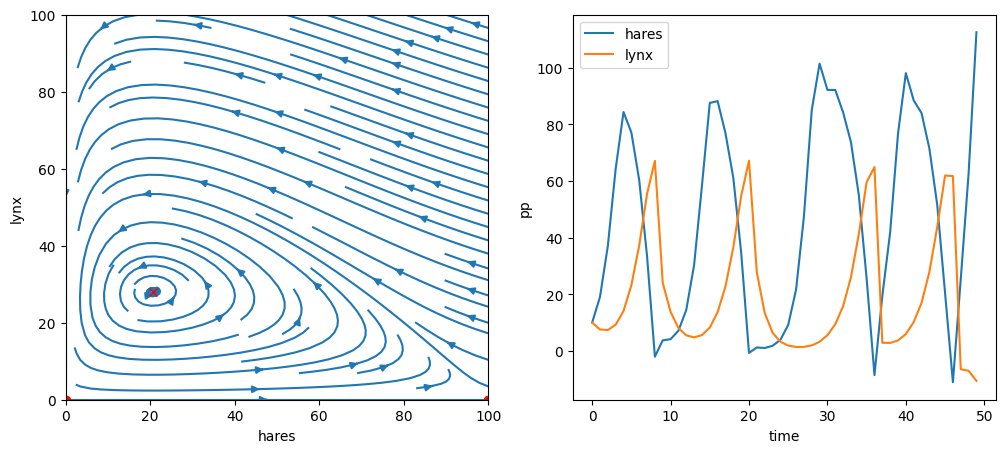

In [248]:
r, k =1.6 ,100
a, c =3.2 ,50
b, d =.6 ,.56


H =np.linspace(0 ,100 , 100);
L =np.linspace(0 ,100 , 100);
x1, x2 =np.meshgrid(H, L);

H_growth_rate =r*x1*(1 -x1/k);  # r: hares growth rate, k: caring capacity of envoirement

HL_interaction_term =a*x1*x2/(x1 +c);

dH =H_growth_rate - HL_interaction_term;     # phase-state
dL =b*(HL_interaction_term) - d*x2;

He = c*d/(a*b - d);
Le = b*c*r*(a*b*k - c*d - d*k)/(k*((a*b -d)**2));

H_init=10; # time domain
L_init=10;
H = H_init; L = L_init;  
Ht=[];Lt=[]

for t in range(0, 50):
    Ht.append(H)
    Lt.append(L)   
    _dH = r*H*(1 - H/k) - a*H*L/(H+c);
    _dL = b*a*H*L/(H+c) - d*L;
    H += _dH   
    L += _dL
    


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.streamplot(x1, x2, dH, dL)
ax1.plot(0,0, marker ='o', color ='red')   # equilibrium points:
ax1.plot(k,0, marker ='o', color ='red')
ax1.plot(He,Le, marker ='x', color ='red') 
ax1.set(xlim=(0,k), ylim=(0,k),xlabel='hares',ylabel='lynx')

ax2.plot(Ht)
ax2.plot(Lt)
ax2.set(xlabel='time',ylabel='pp')
ax2.legend(['hares', 'lynx'])
plt.show()


In [239]:
J = lambda He, Le: np.array([[r-(2*r*He/k)  - a*Le/(He+c) + a*He*Le/((He+c)**2), -a*He/(He+c)], 
                            [((a*b/(He+c)) - (a*b*He/((He+c)**2)))*Le   , -d + a*b*He/(He+c)]])

eiv0, eigv0=np.linalg.eig(J(0, 0))
eiv1, eigv1=np.linalg.eig(J(k, 0))
eiv2, eigv2=np.linalg.eig(J(He, Le))

eiv2

array([0.01204301+0.6911741j, 0.01204301-0.6911741j])

if we consider $\dot{x_n} + \delta \dot{x} =J\cdot \delta x + B\cdot\delta u$ as a linear system and assume $\left[\frac{\partial f}{\partial u}\right]_e =B = I$ then $rank([B \;\;\;JB]) = 2$ and system is compeletly controllable. and for designing a state feedback controller we can use $|\lambda I - J + BK| = 0$ to achive matrix 'K' for specified eigenvalues.<br>
in these kind of systems small changes in K matrix (input u) can cause vastely different responses in time, and it is not practical to control dynamics of populations by linear feedback. insteaded now adays chaos control methods used.
$\delta u = -K \delta x= \begin{bmatrix} k_1 & k_2 \\ k_3 & k_4\end{bmatrix} \cdot \begin{bmatrix} \delta H\\ \delta L\end{bmatrix} \to \dot{x} =J \delta x - K \delta x = [J - K] \delta x$

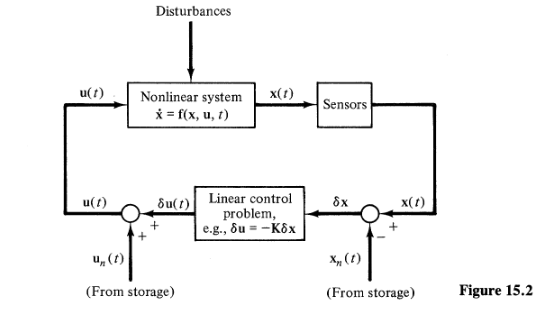



In [215]:
K =lambda k1, k2, k3, k4:np.array([[k1, k2],
                                  [k3, k4]])
np.linalg.eig(J(He, Le)-K(2, -5, 5, 2)).eigenvalues


array([-2.40490196+4.37173357j, -2.40490196-4.37173357j])

The same approach could be done on observability (the jacobian matrix of $\left[ \frac{\partial h}{\partial x}\right]_e = I$) then the system is Observable. to design an observer eigen values of matrix $\lambda I -J + LC$ must be negative so the error approach to zero.